# Description

In this project, initially we preprocess the data and then develop an understanding of different features of the data and creating visualizations. Further,after having sufficient knowledge about the attributes, performed a predictive task of classification to predict whether an individual makes over 50K a year or less,by using different Machine Learning Algorithms.

# Import Library

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')


In [100]:
df=pd.read_csv("Census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [101]:
df.apply(lambda x: len(x.unique()))

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

Most of the column have categorical type

In [102]:
df.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

Here we can see that data imbalance in our target column. will try to resolve later

In [103]:
df.shape

(32560, 15)

we have 32560 rows and 15 columns includ target column

In [104]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [105]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Nine object type columns and left are intiger type

In [106]:
pd.set_option('display.max_rows',None)
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

 Prof-specialty       4140
 Craft-repair         4099
 Exec-manager

In above columns we can see that question mark inplace in missing value so let's try to replace it

In [107]:
df_new=df.apply(lambda x: x.str.strip() if x.dtype=='object' else x)

In [108]:
df=df_new.replace('?',np.NaN)

Using replace function replace the question mark into nan.

In [109]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Here we can see that three column have missing value column workclass,occupation,native_country. then next step is replace missing value

In [110]:
def imput_nan_category(DataFrame,ColName):
    most_frequent_category=DataFrame[ColName].mode()[0]  # .mode()[0]--->first category name
    DataFrame[ColName + "_Imputed"] = DataFrame[ColName] # replace nan values with most occured category
    DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)

Function for replacing missing value. Three columns are categorical column so lets try to replace with mode

In [111]:
for columns in ['Workclass','Occupation','Native_country']:
    imput_nan_category(df,columns)
    

Impute function

In [112]:
df[['Workclass','Workclass_Imputed','Occupation','Occupation_Imputed','Native_country','Native_country_Imputed']].head(10)

,Workclass,Workclass_Imputed,Occupation,Occupation_Imputed,Native_country,Native_country_Imputed
0,Self-emp-not-inc,Self-emp-not-inc,Exec-managerial,Exec-managerial,United-States,United-States
1,Private,Private,Handlers-cleaners,Handlers-cleaners,United-States,United-States
2,Private,Private,Handlers-cleaners,Handlers-cleaners,United-States,United-States
3,Private,Private,Prof-specialty,Prof-specialty,Cuba,Cuba
4,Private,Private,Exec-managerial,Exec-managerial,United-States,United-States
5,Private,Private,Other-service,Other-service,Jamaica,Jamaica
6,Self-emp-not-inc,Self-emp-not-inc,Exec-managerial,Exec-managerial,United-States,United-States
7,Private,Private,Prof-specialty,Prof-specialty,United-States,United-States
8,Private,Private,Exec-managerial,Exec-managerial,United-States,United-States
9,Private,Private,Exec-managerial,Exec-managerial,United-States,United-States


In [113]:
df=df.drop(['Workclass','Occupation','Native_country'],axis=1)

Droped original columns. we have three more columns inclue original data and filled with missing rows

In [114]:
df.isnull().sum()

Age                       0
Fnlwgt                    0
Education                 0
Education_num             0
Marital_status            0
Relationship              0
Race                      0
Sex                       0
Capital_gain              0
Capital_loss              0
Hours_per_week            0
Income                    0
Workclass_Imputed         0
Occupation_Imputed        0
Native_country_Imputed    0
dtype: int64

All the missing columns are filled with mode

In [115]:
#!pip install imblearn

<AxesSubplot:xlabel='Relationship', ylabel='count'>

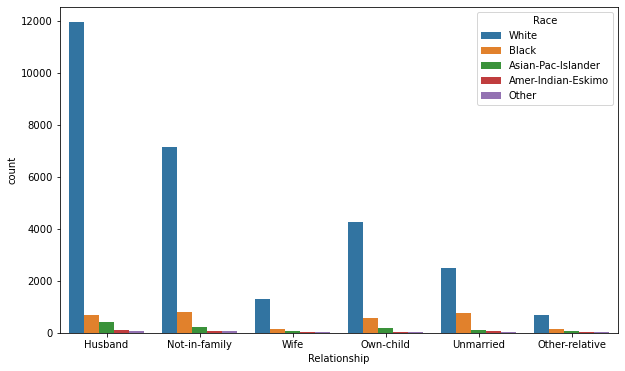

In [116]:
plt.figure(figsize=(10,6))
sns.countplot(x="Relationship",hue="Race",data=df)

Here we can see that all the classes in relationship white category is high income group

<AxesSubplot:ylabel='Frequency'>

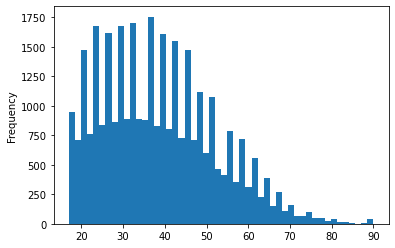

In [117]:
df["Age"].plot.hist(bins=50)

<AxesSubplot:xlabel='Sex', ylabel='count'>

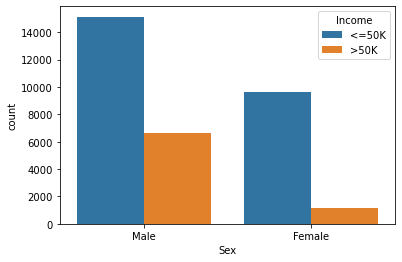

In [118]:
sns.countplot(x="Sex",hue="Income",data=df)

Income is compare between male and female 50 above is higher in male section 50 below in very less in female

<AxesSubplot:xlabel='Workclass_Imputed', ylabel='count'>

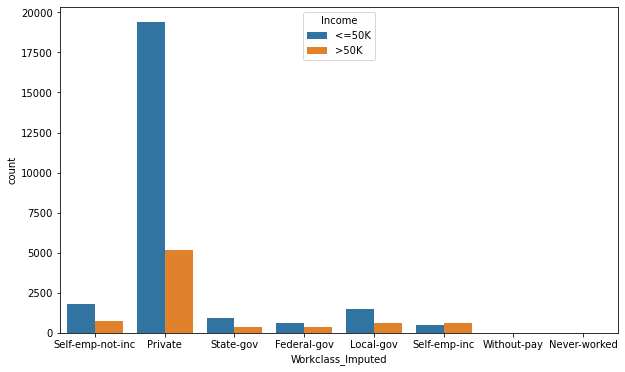

In [119]:
plt.figure(figsize=(10,6))
sns.countplot(x="Workclass_Imputed",hue="Income",data=df)

Privet worker are the highest income groups

<AxesSubplot:xlabel='Education', ylabel='count'>

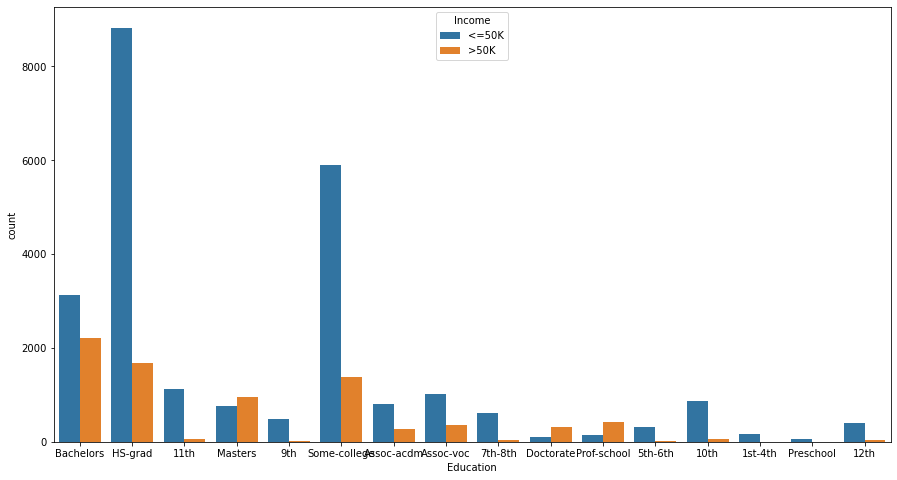

In [120]:
plt.figure(figsize=(15,8))
sns.countplot(x="Education",hue="Income",data=df)

HS graduate group are the 50k income groups

<AxesSubplot:xlabel='Race', ylabel='count'>

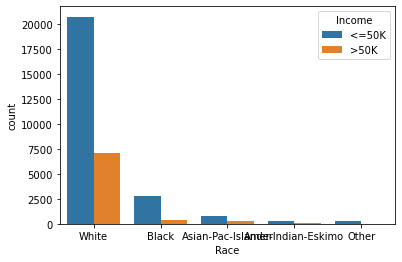

In [121]:
sns.countplot(x="Race",hue="Income",data=df)

comparitivly high income class is white

In [122]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1 There are lots of differents in mean and median in Capital_gain and Capital_loss column.

2  75% and max also huge differents in capital_gain and capital_loss column

<AxesSubplot:xlabel='Capital_gain'>

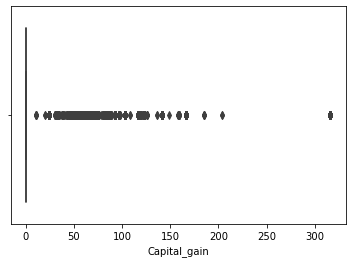

In [218]:
sns.boxplot(df["Capital_gain"])

Number of outlier can seen in this column

<AxesSubplot:xlabel='Capital_loss'>

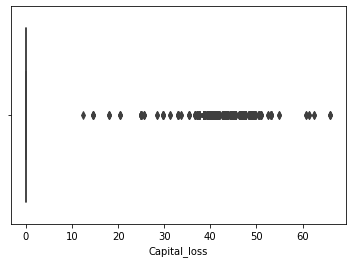

In [219]:
sns.boxplot(df["Capital_loss"])

Here also number of outliers

In [125]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [126]:
df["Capital_gain"]=np.sqrt(df["Capital_gain"])
df["Capital_gain"].skew()

5.894949262441532

In [127]:
df["Capital_loss"]=np.sqrt(df["Capital_loss"])
df["Capital_loss"].skew()

4.376279267452659

# Encoding

In [128]:
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=LabelEncoder().fit_transform(df[col])

In [129]:
df.head()

,Age,Fnlwgt,Education,Education_num,Marital_status,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_Imputed,Occupation_Imputed,Native_country_Imputed
0,50,83311,9,13,2,0,4,1,0.0,0.0,13,0,5,3,38
1,38,215646,11,9,0,1,4,1,0.0,0.0,40,0,3,5,38
2,53,234721,1,7,2,0,2,1,0.0,0.0,40,0,3,5,38
3,28,338409,9,13,2,5,2,0,0.0,0.0,40,0,3,9,4
4,37,284582,12,14,2,5,4,0,0.0,0.0,40,0,3,3,38


In [143]:
x  = df.drop(columns=["Income"])
y = df[["Income"]]

In [144]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [145]:
df["Income"].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3 , random_state = 0)

In [147]:
print("Number transaction x_train dataset", x_train.shape)
print("Number transaction y_train dataset", y_train.shape)
print("Number transaction x_test dataset", x_test.shape)
print("Number transaction y_test dataset", y_test.shape)

Number transaction x_train dataset (22792, 14)
Number transaction y_train dataset (22792, 1)
Number transaction x_test dataset (9768, 14)
Number transaction y_test dataset (9768, 1)


In [221]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.63      0.52      0.57      7478
           1       0.59      0.69      0.63      7354

    accuracy                           0.60     14832
   macro avg       0.61      0.61      0.60     14832
weighted avg       0.61      0.60      0.60     14832



Here we can see that f1 score is 88 but recall of minority class is very less.so it is proves that this is not the best model. Now we will apply imbalance data handling technique

# Random Over sampling

 Imbalanced target column

In [163]:
df["Income"].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [166]:
count_class_0,count_class_1 = df.Income.value_counts()

df_class_0 = df[df["Income"]==0]
df_class_1 = df[df["Income"]==1]
print(df_class_0.shape)
print(df_class_1.shape)
print(count_class_0,count_class_1)

(24719, 15)
(7841, 15)
24719 7841


In [167]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)

Income_new = pd.concat([df_class_0,df_class_1_over],axis=0)
print("Random over-sampling:")

print(Income_new.Income.value_counts())

Random over-sampling:
1    24719
0    24719
Name: Income, dtype: int64


In [168]:
x = Income_new.drop("Income",axis="columns")
y = Income_new[["Income"]]

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3 , random_state = 0)

In [220]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.6043689320388349
              precision    recall  f1-score   support

           0       0.63      0.52      0.57      7478
           1       0.59      0.69      0.63      7354

    accuracy                           0.60     14832
   macro avg       0.61      0.61      0.60     14832
weighted avg       0.61      0.60      0.60     14832



After solving the imbalance issue recall and f1 score are near by both '0' and '1' . Before it was huge differents in both

In [175]:

maxAccu=0
maxRs=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lr =LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i

print("best accuracy is",maxAccu,"on random_state",maxRs)        

best accuracy is 0.7219736438859945 on random_state 4


In [177]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.3,random_state=4)

In [182]:
def eval(r):
    model=r
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test,pred)
    print("Accuracy score is:",acc)
    print("\n")
    print(classification_report(y_test,pred))
    print("\n")
    plot_roc_curve(model,x_test,y_test)
    plt.title("Receiver operating characteristics")
    plt.xlabel("False positive Rate")
    plt.ylabel("True positive Rate")
    plt.show()
    

Accuracy score is: 0.6043689320388349


              precision    recall  f1-score   support

           0       0.63      0.52      0.57      7478
           1       0.59      0.69      0.63      7354

    accuracy                           0.60     14832
   macro avg       0.61      0.61      0.60     14832
weighted avg       0.61      0.60      0.60     14832





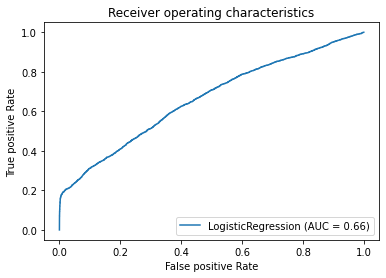

In [183]:
eval(LogisticRegression())

In [193]:
lr=LogisticRegression()
parameter = {'C':10.0 **np.arange(-2,3),
            'penalty':['l1','l2','elasticnet','none'],
            'solver':['newton-cg','lbfgs','saga']}

cv=KFold(n_splits=5,random_state=None,shuffle=False)

gcv=GridSearchCV(lr,parameter,cv=cv)

In [194]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'saga']})

In [195]:
gcv.best_params_

{'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [196]:
lr_new=LogisticRegression(C=10.0,penalty='l2',solver='newton-cg')
lr_new.fit(x_train,y_train)
pred=lr_new.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.7713052858683926
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      7478
           1       0.77      0.77      0.77      7354

    accuracy                           0.77     14832
   macro avg       0.77      0.77      0.77     14832
weighted avg       0.77      0.77      0.77     14832



now accuracy score increase from previous. Lets try other model

Accuracy score is: 0.7090749730312838


              precision    recall  f1-score   support

           0       0.74      0.64      0.69      7478
           1       0.68      0.77      0.73      7354

    accuracy                           0.71     14832
   macro avg       0.71      0.71      0.71     14832
weighted avg       0.71      0.71      0.71     14832





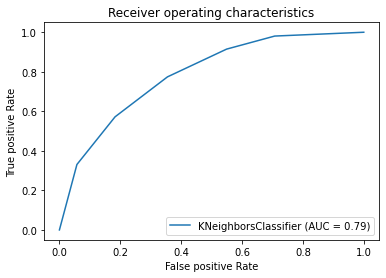

In [198]:
eval(KNeighborsClassifier())

In [199]:
kn=KNeighborsClassifier()

parameter={'n_neighbors':np.arange(0,8),
          'weights':['uniform','distance'],
          'algorithm':['auto','ball_tree','brute']}

cv = KFold ( n_splits = 5,shuffle = False ,random_state = None)

gcv = GridSearchCV(kn,parameter,cv=cv)

In [200]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'brute'],
                         'n_neighbors': array([0, 1, 2, 3, 4, 5, 6, 7]),
                         'weights': ['uniform', 'distance']})

In [201]:
gcv.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'uniform'}

In [208]:
kn_new=KNeighborsClassifier(algorithm ='ball_tree',n_neighbors = 1, weights = 'uniform')
kn_new.fit(x_train,y_train)
pred=kn_new.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.8562567421790723
              precision    recall  f1-score   support

           0       0.93      0.78      0.84      7478
           1       0.80      0.94      0.87      7354

    accuracy                           0.86     14832
   macro avg       0.87      0.86      0.86     14832
weighted avg       0.87      0.86      0.86     14832



now it is increase 70 to 85 .good model

Accuracy score is: 0.9302858683926645


              precision    recall  f1-score   support

           0       0.97      0.89      0.93      7478
           1       0.89      0.98      0.93      7354

    accuracy                           0.93     14832
   macro avg       0.93      0.93      0.93     14832
weighted avg       0.93      0.93      0.93     14832





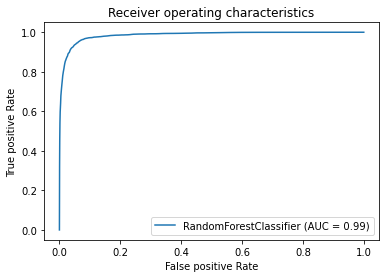

In [210]:
eval(RandomForestClassifier())

very good performance. lets try to improve performance

In [216]:
rf = RandomForestClassifier()

parameter = {'max_features':['auto','sqrt','log2'],
            'criterion': ['gini','entropy'],
            'max_depth': np.arange(1,10)}

cv=KFold(n_splits=5,shuffle=False, random_state=None)
gcv = GridSearchCV (rf , parameter , cv=cv)

In [217]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [222]:
gcv.best_params_

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto'}

In [223]:
rf_new=RandomForestClassifier( criterion = 'gini', max_depth= 9 ,max_features='auto')
rf_new.fit(x_train,y_train)
pred=rf_new.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.8367044228694714
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      7478
           1       0.79      0.90      0.85      7354

    accuracy                           0.84     14832
   macro avg       0.84      0.84      0.84     14832
weighted avg       0.84      0.84      0.84     14832



 here we can clearly say that accuracy of the model was decrease. So model is over fitting.

conclusion:

Best model is KNeighborsClassifier . It's accuracy is 70 and after try to hyper parameter tuning it was increase to 85.

# Save

In [224]:
import joblib
joblib.dump(kn_new,"kn_Income.pkl")

['kn_Income.pkl']